In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
IMAGE_SIZE = [224, 224]

train_data_dir = 'gdrive/My Drive/Kaggle/data/train'
validation_data_dir = 'gdrive/My Drive/Kaggle/data/validation'

In [4]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in resnet.layers:
  layer.trainable = False

94773248/94765736 [==============================] - 2s 0us/step


In [5]:
folders = glob('gdrive/My Drive/Kaggle/data/train/*')
print(len(folders))

2


In [6]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [8]:
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(validation_data_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2048 images belonging to 2 classes.
Found 832 images belonging to 2 classes.


In [12]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
64/64 [==============================] - 1291s 20s/step - loss: 1.4071 - accuracy: 0.5664 - val_loss: 0.6644 - val_accuracy: 0.6370
Epoch 2/5
64/64 [==============================] - 436s 7s/step - loss: 0.7609 - accuracy: 0.6152 - val_loss: 0.8572 - val_accuracy: 0.5168
Epoch 3/5
64/64 [==============================] - 435s 7s/step - loss: 0.9341 - accuracy: 0.5854 - val_loss: 0.5834 - val_accuracy: 0.6995
Epoch 4/5
64/64 [==============================] - 439s 7s/step - loss: 0.7173 - accuracy: 0.6392 - val_loss: 0.6081 - val_accuracy: 0.6851
Epoch 5/5
64/64 [==============================] - 439s 7s/step - loss: 0.8577 - accuracy: 0.5986 - val_loss: 0.8043 - val_accuracy: 0.6526


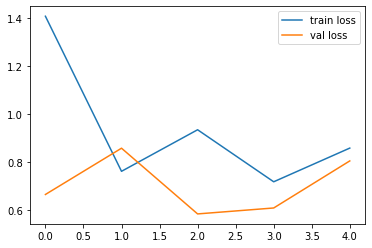

In [13]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

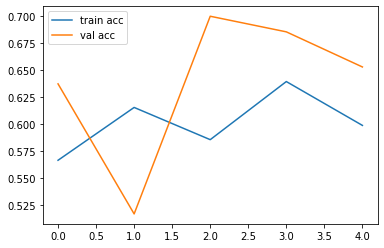

In [14]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()